### PERKENALAN

- Nama : Gede Aldi 
- Batch : RMT-29

> Objective yang ingin saya capai disini adalah untuk melihat : 
> 1. Bagaimanakah perilaku dari pelanggan apakah akan melakukan bank term deposit atau tidak?

> 2. Bagaimanakah karakteristik dari pelanggan yang kita punya?

> 3. Apakah klasifikasi model terbaik yang dapat memprediksi pelanggan akan melakukan bank term deposit atau tidak?

> 4. Apakah hyperparameter tuning dapat menambah akurasi dari model?

### IMPORT LIBRARIES

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.svm import SVC
import joblib

In [3]:
df = pd.read_csv(r'C:\Users\User\github-classroom\FTDS-assignment-bay\p1-ftds029-rmt-m2-gedealdi28\bank.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Terlihat bahwa data yang kita punya itu mempunyai 4500 baris dan 17 kolom selanjutnya akan dilakukan eksplorasi data apakah terdapat missing value atau duplikat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Berikut adalah penjelasan dari tiap kolomnya
   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8. loan: has personal loan? (binary: "yes","no") related with the last contact of the current campaign:
   9.  contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10.  day: last contact day of the month (numeric)
  11.  month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12.  duration: last contact duration, in seconds (numeric)
  13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15.  previous: number of contacts performed before this campaign and for this client (numeric)
  16.  poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

In [5]:
print('Jumlah Duplikat:',df.duplicated().sum()) # menampilkan jumlah duplikat

Jumlah Duplikat: 0


 Jumlah duplikat di data ini adalah 0 sehingga selanjutnya akan dilakukan eksplorasi visualisasi data untuk melihat bagaimana karakteristik dari pelanggan sehingga nantinya kita bisa melakukan evaluasi apakah pelanggan tersebut akan melakukan bank term deposit atau tidak

### EXPLORATORY DATA ANALYSIS

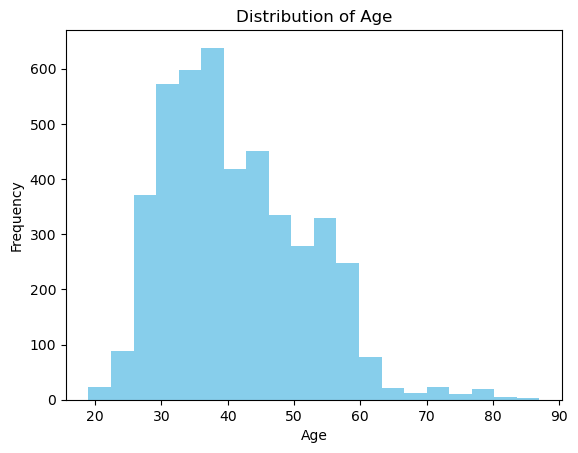

In [64]:
plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribusi Umur')
plt.show()

Untuk gambar pertama kita akan melihat bagaimana distribusi pelanggan berdasarkan umurnya terlihat bahwa pelanggan itu rata-rata berada pada umur 25 hingga 55. Dan umur terbanyak pelanggan jatuh pada umur sebelum persis 40 tahun dimana pada umur ini pelanggan berjumlah hingga lebih dari 600. Lalu terdapat juga Beberapa pelanggan yang berada di umur 70 hingga 80 tetapi jumlahnya tidak terlalu banyak yaitu kurang dari 100

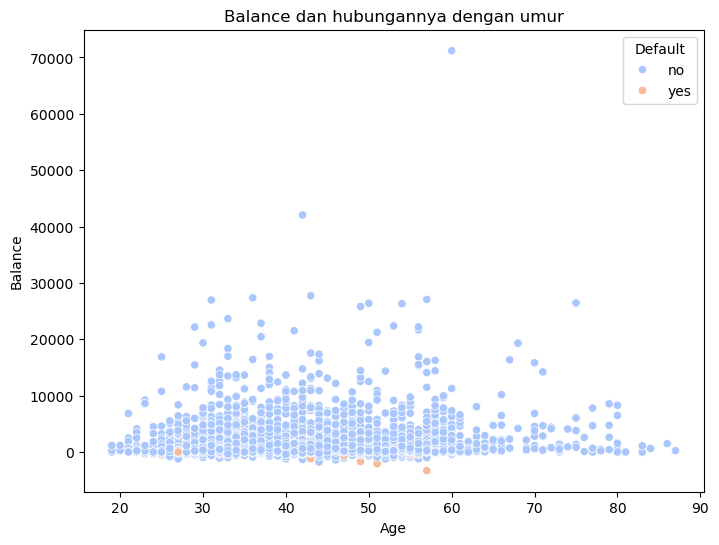

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', hue='default', data=df, palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Balance dan hubungannya dengan umur')
plt.legend(title='Default')
plt.show()

Lalu kita akan melihat bagaimana hubungan dari umur dan apakah pelanggan tersebut berkata iya atau tidak terhadap investasi yang ditawarkan oleh bank, terlihat bahwa kebanyakan pelanggan itu berkata tidak dan menolak. Dan hanya beberapa yang terlihat menerima tawaran di umur-umur tertentu seperti umur 50 hingga 60 tahun. Hal ini mungkin dikarenakan di umur-umur segini banyak uang yang sudah dihasilkan tetapi di umur segini baru banyak yang kepikiran atau mempunyai uang diinvestasikan

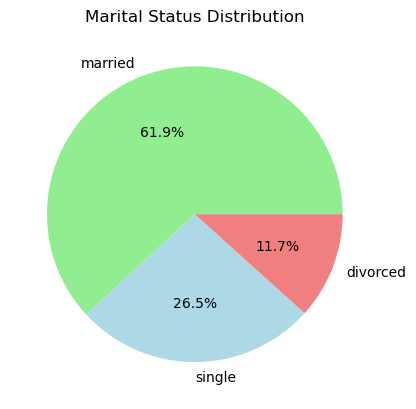

In [66]:
marital_counts = df['marital'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Marital Status Distribution')
plt.show()

 Lalu jika kita melihat bagaimana status pernikahan pelanggan, terlihat bahwa 61,9% dari pelanggan merupakan pelanggan yang sudah menikah. . Dan 26,5% nya itu masih single. Dan 11,7% pelanggan itu sudah bercerai. Dari sebaran ini bisa terlihat bahwa pelanggan yang sudah menikah biasanya rata-rata memiliki uang tabungan yang lebih banyak jika akan diinvestasikan sehingga tawaran kita mungkin akan lebih diterima oleh golongan ini daripada golongan yang lain

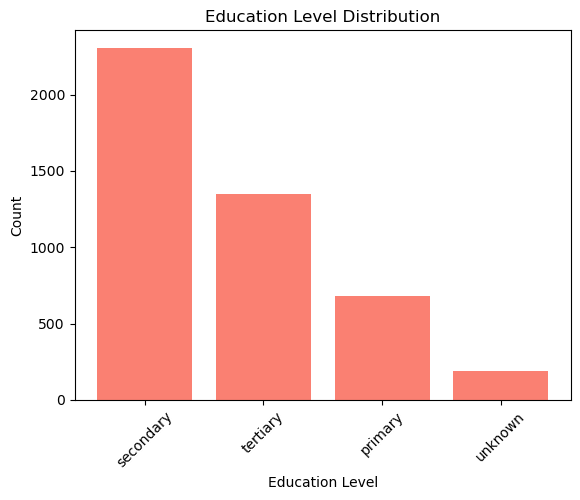

In [67]:
education_counts = df['education'].value_counts()
plt.bar(education_counts.index, education_counts.values, color='salmon')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

 Jika kita melihat dari distribusi pelanggan berdasarkan tingkat edukasinya terlihat bahwa pelanggan itu rata-rata menempuh pendidikan tingkat sekunder. Di mana itu adalah tingkat SMA dan belum melanjutkan ke perguruan tinggi Hal ini mungkin bisa menggambarkan Kenapa banyak pelanggan yang Menolak adanya investasi karena belum punya uang yang terlalu banyak. Lalu golongan pelanggan kedua yang terbanyak adalah pelanggan yang masih menempuh pendidikan tingkat tersier atau sedang dan sudah melewati perguruan tinggi. Di mana terdapat lebih dari 1000 dan kurang dari 1500 orang ada pada di golongan ini. Untuk dari itu golongan ini seharusnya sudah mempunyai kemampuan untuk menghasilkan sehingga mempunyai kecenderungan untuk berinvestasi. Tetapi mungkin karena kurangnya penawaran yang baik dari kita sehingga menyebabkan banyak yang penolak tawaran ini. Selanjutnya akan dilakukan feature engineering untuk melakukan seleksi fitur (variabel independen) yang digunakan dalam model training

### FEATURE ENGINEERING

In [6]:
X = df.drop('y',axis=1)
y= df[['y']]

In [7]:
num = X.select_dtypes(exclude=['object']).columns.tolist()
kat = X.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik:',num)
print('Data Kategorik:',kat)

Data Numerik: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Data Kategorik: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Pertama-tama akan dibagi data menjadi data numerik dan juga data kategorik untuk melihat bagaimana korelasinya dengan y atau kolom variabel dependen kita

In [8]:
significant_cols = []
for col in kat:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:  # Ubah nilai alpha sesuai kebutuhan Anda
        significant_cols.append(col)
        print(f"Kolom {col} memiliki hubungan yang signifikan dengan variabel target 'y'.")
        print(f"Chi2 Statistic: {chi2}")
        print(f"P-value: {p}")
        print("---")

print("Kolom yang memiliki hubungan signifikan dengan variabel target 'y':")
print(significant_cols)

Kolom job memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 68.98828575267176
P-value: 1.901391096662705e-10
---
Kolom marital memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 19.03005634409817
P-value: 7.373535401823763e-05
---
Kolom education memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 15.236579554873757
P-value: 0.001625240003630989
---
Kolom housing memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 48.88462833144263
P-value: 2.7146998959323014e-12
---
Kolom loan memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 21.87182161746215
P-value: 2.9148288298428256e-06
---
Kolom contact memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 87.86985650165812
P-value: 8.30430129641147e-20
---
Kolom month memiliki hubungan yang signifikan dengan variabel target 'y'.
Chi2 Statistic: 250.50006340911358
P-value: 2.19535483357081

Dengan menggunakan Chi squared value terlihat bahwa semua kolom selain kolom default itu mempunyai hubungan dengan variabel dependen kita sehingga kedepannya hanya kolom default yang akan kita drop dan kolom lainnya akan kita pilih menjadi

In [9]:
group_yes = df[df['y'] == 'yes']
group_no = df[df['y'] == 'no']

# Melakukan uji t-test untuk setiap variabel numerik
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_cols:
    groups = []
    for group_name, group_data in df.groupby('y'):
        groups.append(group_data[col])
    f_statistic, p_value = f_oneway(*groups)
    print(f"Uji ANOVA untuk {col}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    alpha = 0.05  # Nilai alpha (tingkat signifikansi)
    if p_value < alpha:
        print("Kesimpulan: Ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.")
    else:
        print("Kesimpulan: Tidak ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.")
    print("---")

Uji ANOVA untuk age:
F-statistic: 9.207070699335345
P-value: 0.0024245358173772096
Kesimpulan: Ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.
---
Uji ANOVA untuk balance:
F-statistic: 1.4492223355179277
P-value: 0.2287158303857946
Kesimpulan: Tidak ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.
---
Uji ANOVA untuk duration:
F-statistic: 866.5057596539403
P-value: 2.1504449021590626e-174
Kesimpulan: Ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.
---
Uji ANOVA untuk campaign:
F-statistic: 16.959992198086955
P-value: 3.885793571201471e-05
Kesimpulan: Ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.
---
Uji ANOVA untuk pdays:
F-statistic: 49.49538035599507
P-value: 2.287071248715647e-12
Kesimpulan: Ada hubungan yang signifikan antara variabel numerik dan variabel target kategorikal.
---
Uji ANOVA untuk previous:
F-statistic: 62.4091441937

 Sedangkan untuk kolam numerik akan dilakukan uji ANOVA untuk melihat korelasinya dengan kolom yang merupakan variabel dependen. Uji ANOVA dilakukan karena variabel dependen kita berbentuk string yang hanya berisi yes dan no. Dari hasil uji ANOVA terlihat bahwa hanya kolom balance yang tidak mempunyai hubungan signifikan terhadap variabel dependen kita. Sehingga kolom ini akan kita drop dan sisanya akan kita gunakan sebagai fitur

In [10]:
X.drop(['default','balance'], axis=1, inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (3164, 14)
Test size  :  (1357, 14)


 Setelah drop fitur yang tidak digunakan dilakukan splitting data di mana hanya digunakan 30% data sebagai data uji dan 70% data merupakan data latihan

In [12]:
X_train.columns, X_test.columns

(Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
        'poutcome'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
        'poutcome'],
       dtype='object'))

In [13]:
num1 = X.select_dtypes(exclude=['object']).columns.tolist()
kat1 = X.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik:',num1)
print('Data Kategorik:',kat1)

Data Numerik: ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']
Data Kategorik: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']


### HANDLING OUTLIER TRAIN SET

In [14]:
num_cols = list(X_train.select_dtypes(exclude='object').columns) # Mengambil data numerik dari dataframe

listItem = [] # membuat list kosong untuk nantinya di tambahkan nilai skewness

for col in num_cols:
    listItem.append([col,X_train[col].skew()]) # mengecek skewness di tiap kolom data numerik

pd.DataFrame(columns=['Kolom Numerik','Nilai Skewness'],data = listItem)

,Kolom Numerik,Nilai Skewness
0,age,0.695611
1,day,0.071782
2,duration,2.752114
3,campaign,4.866012
4,pdays,2.639013
5,previous,5.553615


Selanjutnya akan dilakukan handling dari outliers. Di mana dilihat terlebih dahulu skewness dari data latihan. Terlihat bahwa selain kolom hari semua kolom itu mempunyai data yang highly skewed

In [15]:
winsoriser_smua = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['age','duration','campaign'],
                            missing_values='ignore')

winsoriser_smua.fit(X_train)
X_train = winsoriser_smua.transform(X_train)

In [16]:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem = []

for col in num_cols:
    listItem.append([col,X_train[col].skew()])

pd.DataFrame(columns=['Kolom Numerik','Nilai Skewness'],data = listItem)

,Kolom Numerik,Nilai Skewness
0,age,0.695611
1,day,0.071782
2,duration,1.648212
3,campaign,1.717062
4,pdays,2.639013
5,previous,5.553615


Karena datanya masih highly skewed maka akan dilakukan Kevin menggunakan teknik iqr. Teknik ini digunakan karena datanya tidak berdistribusi normal. Dan jika berdistribusi normal teknik yang digunakan adalah gaussian

### HANDLING OUTLIER TEST SET

In [17]:
num_cols = list(X_test.select_dtypes(exclude='object').columns)

listItem = []

for col in num_cols:
    listItem.append([col,X_test[col].skew()])

pd.DataFrame(columns=['Kolom Numerik','Nilai Skewness'],data = listItem)

,Kolom Numerik,Nilai Skewness
0,age,0.708251
1,day,0.147312
2,duration,2.820459
3,campaign,4.373787
4,pdays,2.897061
5,previous,6.712154


Setelah kita capping masih terdapat banyak data yang highly skewed walaupun distribusi data sudah membaik dari sebelumnya. Maka dari itu nantinya akan digunakan scaling berupa MinMaxScaler untuk menangani hal ini

In [18]:
X_test = winsoriser_smua.transform(X_test)

In [19]:
num_cols = list(X_test.select_dtypes(exclude='object').columns)

listItem = []

for col in num_cols:
    listItem.append([col,X_test[col].skew()])

pd.DataFrame(columns=['Kolom Numerik','Nilai Skewness'],data = listItem)

,Kolom Numerik,Nilai Skewness
0,age,0.708251
1,day,0.147312
2,duration,1.690906
3,campaign,1.708138
4,pdays,2.897061
5,previous,6.712154


 Lalu untuk selanjutnya kita akan melakukan handling outliers dari data set uji. Dan dan setelah melihat skewness tinggi diterapkan juga metode capping dengan teknik iqr tetapi seperti data latihan, masih banyak yang highly skewed walaupun distribusinya sudah membaik

## HANDLING MISSING VALUE

In [20]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [21]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [22]:
y_test

,y
835,no
920,no
103,no
1158,no
3386,no
...,...
1577,no
818,no
423,no
1872,yes


Setelah melakukan pengecekan, kita dapat melihat bahwa tidak ada missing value dalam data kita. Sehingga kita akan melanjutkan dengan melakukan model training menggunakan pipeline

### MODEL DEFINITION

- K-Nearest Neighbors (KNN) Classification:

> KNN adalah algoritma yang sederhana namun efektif untuk klasifikasi dan regresi.
Pada dasarnya, KNN mengklasifikasikan objek berdasarkan mayoritas label dari K tetangga terdekatnya dalam ruang fitur.
Prosesnya melibatkan pengukuran jarak antara titik data yang akan diklasifikasikan dengan titik-titik data lainnya dalam set pelatihan.
K adalah parameter yang ditentukan sebelumnya yang menentukan jumlah tetangga yang akan digunakan untuk menentukan label.

- Support Vector Machine (SVM) Classification:

> SVM adalah algoritma pembelajaran yang kuat untuk klasifikasi dan regresi.
Tujuannya adalah untuk menemukan hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur sedemikian rupa sehingga margin (jarak terdekat antara hyperplane dan titik-titik terdekat) maksimum.
SVM mencari hyperplane optimal dengan menggunakan teknik optimasi matematika yang kompleks.
SVM memiliki kemampuan untuk menangani data non-linear melalui penggunaan fungsi kernel yang memetakan data ke dimensi yang lebih tinggi.

- Decision Tree:

> Decision tree adalah algoritma pembelajaran yang membangun model prediksi dalam bentuk struktur pohon keputusan.
Setiap simpul dalam pohon mewakili keputusan berdasarkan fitur tertentu.
Proses pembelajaran membagi data berdasarkan fitur yang memberikan informasi paling signifikan (misalnya, mengurangi keragaman dalam kelas target).
Decision tree dapat dengan mudah diinterpretasikan dan visualisasi, dan cocok untuk pemodelan klasifikasi dan regresi.

- XGBoost (Extreme Gradient Boosting):

> XGBoost adalah implementasi dari algoritma gradient boosting yang sangat efisien dan sangat populer.
Ini adalah model ensemble yang terdiri dari banyak pohon keputusan lemah Proses pembelajaran dilakukan secara iteratif, di mana setiap pohon berikutnya berusaha untuk memperbaiki kesalahan prediksi dari pohon sebelumnya.
XGBoost memiliki banyak parameter penyesuaian untuk mengoptimalkan kinerja model dan mencegah overfitting.

- Random Forest:

> Random forest juga merupakan model ensemble yang terdiri dari banyak pohon keputusan.
Namun, dalam random forest, pohon-pohon tersebut dibangun secara independen dan secara acak menggunakan subset acak dari fitur dan data.
Prediksi akhir dihasilkan dengan mengambil hasil mayoritas dari prediksi individual dari setiap pohon.
Random forest cenderung memiliki kinerja yang baik dalam berbagai situasi dan sering digunakan karena sifatnya yang stabil dan kemampuannya untuk menangani data yang berukuran besar dengan fitur yang banyak.

### MODEL TRAINING

#### MODEL TRAINING USING PIPELINE

Pipeline pada pada model training ini akan dilakukan pada semua model dengan tahapan yang pertama dibuat pipeline untuk kolom numerik dan kolom kategorik. Di mana pada kolom numerik akan dilakukan scaling dengan menggunakan MinMaxScaler dikarenakan data yang masih banyak berjenis highly skewed. Lalu untuk data kategori akan digunakan Ordinal Encoder . Setelah itu dilakukan penggabungan kedua pipeline numerik dan kategorik menggunakan Column Transformer. Dan akan digabungkan hasil penggabungan kedua pipeline dengan model yang akan digunakan dalam satu pipeline akhir

#### K-NEAREST NEIGHBORS PIPELINE MODEL

In [23]:
# Definisikan pipeline untuk data numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Definisikan pipeline untuk data kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='error'))
])

# Gabungkan kedua pipeline di atas dengan ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num1),
    ('pipe_cat', cat_pipeline, kat1)
])

# Gabungkan preprocessing_pipeline dengan KNeighborsClassifier dalam satu pipeline
knn_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('knn', KNeighborsClassifier())
])

In [24]:
knn_pipeline.fit(X_train, y_train)
print('Training Score: ',round(knn_pipeline.score(X_train, y_train),3))
print('Testing Score: ', round(knn_pipeline.score(X_test, y_test),3))

Training Score:  0.904
Testing Score:  0.887


c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Setelah melakukan fit pada baseline model KNN didapat bahwa model ini menghasilkan overfit di mana training skornya adalah 0,904 dan testing skornya 0,887

#### SVC PIPELINE MODEL TRAINING

In [25]:
# Definisikan pipeline untuk data numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Definisikan pipeline untuk data kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown="error"))
])

# Gabungkan kedua pipeline di atas dengan ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num1),
    ('pipe_cat', cat_pipeline, kat1)
])

# Gabungkan preprocessing_pipeline dengan SVC dalam satu pipeline
svc_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('svc', SVC())
])

In [26]:
svc_pipeline.fit(X_train, y_train)
print('Training Score: ',round(svc_pipeline.score(X_train, y_train),3))
print('Testing Score: ', round(svc_pipeline.score(X_test, y_test),3))

c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score:  0.885
Testing Score:  0.884


Setelah melakukan fit pada baseline model SVC didapat bahwa model ini menghasilkan goodfit di mana training skornya adalah 0,885 dan testing skornya 0,884

#### DECISION TREE PIPELINE MODEL TRAINING

In [27]:
# Definisikan pipeline untuk data numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Definisikan pipeline untuk data kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown="error"))
])

# Gabungkan kedua pipeline di atas dengan ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num1),
    ('pipe_cat', cat_pipeline, kat1)
])

# Gabungkan preprocessing_pipeline dengan SVC dalam satu pipeline
dtc_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('dtc', DecisionTreeClassifier())
])

In [28]:
dtc_pipeline.fit(X_train, y_train)
print('Training Score: ',round(dtc_pipeline.score(X_train, y_train),3))
print('Testing Score: ', round(dtc_pipeline.score(X_test, y_test),3))

Training Score:  1.0
Testing Score:  0.863


Setelah melakukan fit pada baseline model Decision Tree didapat bahwa model ini menghasilkan overfit di mana training skornya adalah nilai sempurna 1 dan testing skornya hanya 0,863

In [29]:
# print("Jumlah 'no':", sum(y_dtc_pred == 'no'))
# print("Jumlah 'yes':", sum(y_dtc_pred == 'yes'))

#### XGBOOST PIPELINE MODEL TRAINING

In [30]:
# Definisikan pipeline untuk data numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Definisikan pipeline untuk data kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown="error"))
])

# Gabungkan kedua pipeline di atas dengan ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num1),
    ('pipe_cat', cat_pipeline, kat1)
])

# Gabungkan preprocessing_pipeline dengan SVC dalam satu pipeline
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('xgb', XGBClassifier())

])

In [31]:
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)

xgb_pipeline.fit(X_train, y_train1)
print('Training Score: ',round(xgb_pipeline.score(X_train, y_train1),3))
print('Testing Score: ', round(xgb_pipeline.score(X_test, y_test1),3))

Training Score:  0.999
Testing Score:  0.894


c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Setelah melakukan fit pada baseline model XGBoost didapat bahwa model ini juga menghasilkan overfit di mana training skornya adalah 0,999 atau hampir sempurna dan testing skornya hanya 0,894

#### RANDOM FOREST PIPELINE MODEL TRAINING

In [32]:
# Definisikan pipeline untuk data numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Definisikan pipeline untuk data kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown="error"))
])

# Gabungkan kedua pipeline di atas dengan ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num1),
    ('pipe_cat', cat_pipeline, kat1)
])

# Gabungkan preprocessing_pipeline dengan SVC dalam satu pipeline
rfc_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('rfc', RandomForestClassifier())

])

In [33]:
rfc_pipeline.fit(X_train, y_train)
print('Training Score: ',round(rfc_pipeline.score(X_train, y_train),3))
print('Testing Score: ', round(rfc_pipeline.score(X_test, y_test),3))

c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Score:  1.0
Testing Score:  0.891


Setelah melakukan fit pada baseline model Random forest juga didapat bahwa model ini menghasilkan overfit di mana training skornya adalah 1 dan testing skornya 0,891

### MODEL EVALUATION

#### KNN EVALUATION

In [34]:
y_knn_pred= knn_pipeline.predict(X_test)
y_knn_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      1200
         yes       0.58      0.10      0.16       157

    accuracy                           0.89      1357
   macro avg       0.74      0.54      0.55      1357
weighted avg       0.86      0.89      0.85      1357



KNN-Confusion Matrix      : 


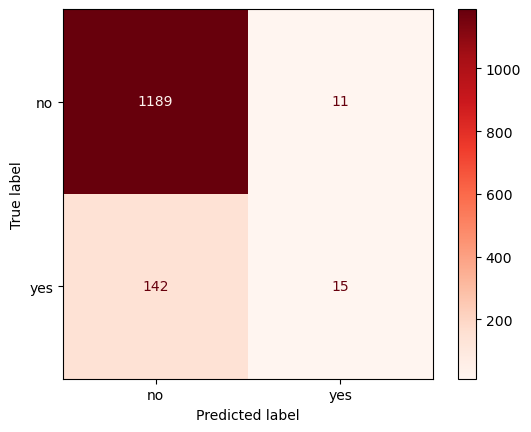

In [35]:
target = ['no', 'yes']
print(classification_report(y_test, y_knn_pred, target_names = target))
print('KNN-Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test, cmap='Reds'))

Jadi, performa model KNN berdasarkan classification report diatas adalah sebagai berikut:

- Untuk kelas "no": Precision ≈ 0.893, Recall ≈ 0.991, dan F1-score ≈ 0.94
- Untuk kelas "yes": Precision ≈ 0.58, Recall ≈ 0.1, dan F1-score ≈ 0.16
> Ini menunjukkan bahwa model memiliki kinerja yang baik dalam memprediksi kelas "no" (karena memiliki precision dan recall yang tinggi), tetapi memiliki kinerja yang buruk dalam memprediksi kelas "yes" (karena memiliki precision dan recall yang rendah).

#### SVC EVALUATION

In [36]:
y_svc_pred= svc_pipeline.predict(X_test)
y_svc_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          no       0.88      1.00      0.94      1200
         yes       0.00      0.00      0.00       157

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.88      0.83      1357

 SVC Confusion Matrix      : 


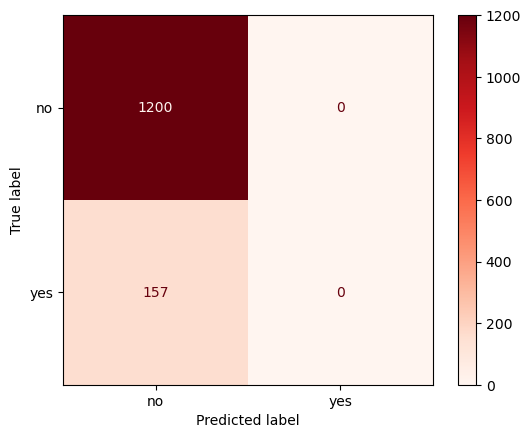

In [37]:
target = ['no', 'yes']
print(classification_report(y_test, y_svc_pred, target_names = target))
print(' SVC Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_pipeline, X_test, y_test, cmap='Reds'))

Performa model SVC berdasarkan classification report di atas adalah sebagai berikut:

- Untuk kelas "no": Precision ≈ 0.884, Recall = 1, dan F1-score ≈ 0.94
- Untuk kelas "yes": Precision tidak dapat dihitung, Recall tidak dapat dihitung, dan F1-score tidak dapat dihitung

> Karena tidak ada prediksi yang benar untuk kelas "yes" (semua hasil prediksi adalah negatif), nilai precision, recall, dan f1-score untuk kelas "yes" bernilai 0 dan model ini sangat buruk untuk menebak kelas yes. Namun, model memiliki kinerja yang baik dalam memprediksi kelas "no", dengan recall sempurna (1) dan F1-score yang tinggi (0.938).

#### RANDOM FOREST EVALUATION

In [38]:
y_rfc_pred= rfc_pipeline.predict(X_test)
y_rfc_pred 

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

Classification Report : 
               precision    recall  f1-score   support

          no       0.91      0.97      0.94      1200
         yes       0.56      0.26      0.36       157

    accuracy                           0.89      1357
   macro avg       0.74      0.62      0.65      1357
weighted avg       0.87      0.89      0.87      1357
 

Random Forest Confusion Matrix      : 


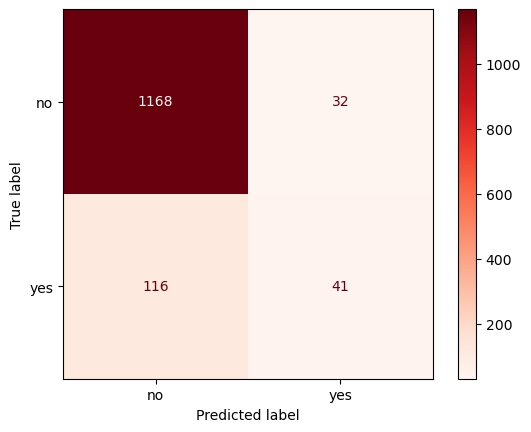

In [39]:
target = ['no', 'yes']
print('Classification Report : \n', classification_report(y_test, y_rfc_pred), '\n')
print('Random Forest Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc_pipeline, X_test, y_test, cmap='Reds'))

Performa model Decision Tree berdasarkan classification report yang diberikan diatas adalah sebagai berikut:

- Untuk kelas "no": Precision ≈ 0.920, Recall ≈ 0.97, dan F1-score ≈ 0.94
- Untuk kelas "yes": Precision ≈ 0.56, Recall ≈ 0.26, dan F1-score ≈ 0.36

> Sama seperti sebelumnya, ini menunjukkan bahwa model memiliki kinerja yang lebih baik dalam memprediksi kelas "no" dibandingkan dengan kelas "yes". Tetapi masih lebih baik memprediksi kelas yes daripada model SVC 

#### DECISION TREE EVALUATION

In [41]:
y_dtc_pred= dtc_pipeline.predict(X_test)
y_dtc_pred 

array(['no', 'no', 'no', ..., 'no', 'yes', 'yes'], dtype=object)

              precision    recall  f1-score   support

          no       0.92      0.93      0.92      1200
         yes       0.40      0.38      0.39       157

    accuracy                           0.86      1357
   macro avg       0.66      0.65      0.66      1357
weighted avg       0.86      0.86      0.86      1357

Decision Tree Confusion Matrix      : 


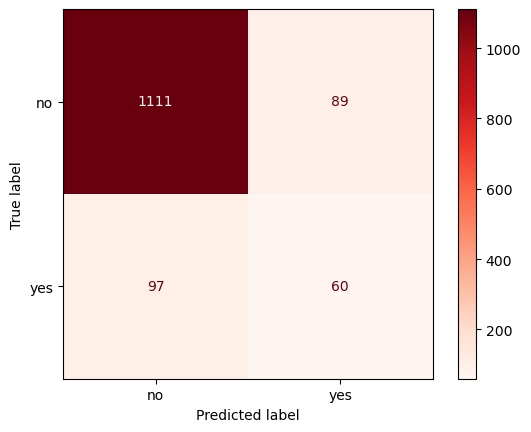

In [42]:
target = ['no', 'yes']
print(classification_report(y_test, y_dtc_pred, target_names = target))
print('Decision Tree Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc_pipeline, X_test, y_test, cmap='Reds'))

Performa model Decision Tree berdasarkan classification report yang diberikan diatas adalah sebagai berikut:

- Untuk kelas "no": Precision ≈ 0.920, Recall ≈ 0.93, dan F1-score ≈ 0.92
- Untuk kelas "yes": Precision ≈ 0.4, Recall ≈ 0.38, dan F1-score ≈ 0.39

> Ini menunjukkan bahwa model Decision Tree memiliki kinerja yang cukup baik dalam memprediksi kelas "no", dengan precision, recall, dan F1-score yang tinggi. Namun, kinerja dalam memprediksi kelas "yes" lebih rendah, dengan nilai precision, recall, dan F1-score yang lebih rendah. Hal ini menunjukkan bahwa model lebih baik dalam memprediksi kelas mayoritas ("no") daripada kelas minoritas ("yes").

#### XGBOOST EVALUATION

In [43]:
y_xgb_pred= xgb_pipeline.predict(X_test)
y_xgb_pred 

array([0, 0, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1200
         yes       0.56      0.39      0.46       157

    accuracy                           0.89      1357
   macro avg       0.74      0.67      0.70      1357
weighted avg       0.88      0.89      0.89      1357

XGBoost Confusion Matrix      : 


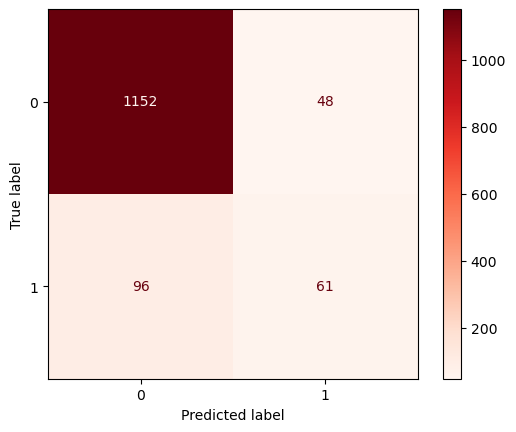

In [44]:
target = ['no', 'yes']
print(classification_report(y_test1, y_xgb_pred, target_names = target))
print('XGBoost Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_pipeline, X_test, y_test1, cmap='Reds'))

Performa model XGBoost berdasarkan classification report yang diberikan dimana 0 adalah kelas "no" dan 1 adalah kelas "yes" adalah sebagai berikut:

- Untuk kelas "no": Precision ≈ 0.92, Recall ≈ 0.96, dan F1-score ≈ 0.94
- Untuk kelas "yes": Precision ≈ 0.56, Recall ≈ 0.39, dan F1-score ≈ 0.46

> Ini menunjukkan bahwa model XGBoost juga memiliki kinerja yang baik dalam memprediksi kelas "no" (tinggi dalam precision, recall, dan F1-score), tetapi memiliki kinerja yang lebih rendah dalam memprediksi kelas "yes" (dengan nilai precision, recall, dan F1-score yang lebih rendah).

#### ACCURACY AND F1 SCORE OF ALL MODEL

In [52]:
pipeline_model = {
    'KNN' : knn_pipeline,
    'SVC' : svc_pipeline,
    'Decision Tree' : dtc_pipeline,
    'Random Forest' : rfc_pipeline
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = pipeline_model.keys(), index=['Accuracy', 'F1-Score'])

for metric, metric_func in metrics.items():
    for model_name, model_pipeline in pipeline_model.items():
        if metric == 'F1-Score':
            pos_label = 'no' 
            df_model.loc[metric, model_name] = metric_func(y_test, model_pipeline.predict(X_test), pos_label=pos_label)
        else:
            df_model.loc[metric, model_name] = metric_func(y_test, model_pipeline.predict(X_test))

In [55]:
# Menghitung skor akurasi dan F1-Score
accuracy = accuracy_score(y_test1, y_xgb_pred)
f1 = f1_score(y_test1, y_xgb_pred, pos_label=0)  # pos_label sesuaikan dengan kelas positif

# Menambahkan skor ke DataFrame df_model
df_model.loc['Accuracy', 'XGB'] = accuracy
df_model.loc['F1-Score', 'XGB'] = f1

In [56]:
df_model

,KNN,SVC,Decision Tree,Random Forest,XGB
Accuracy,0.887251,0.884304,0.862933,0.890936,0.893884
F1-Score,0.93955,0.9386,0.922757,0.940419,0.941176


Dari hasil gabungan akurasi dan F1-score semua model terlihat bahwa random forest dan XGBoost lah yang paling baik dalam melakukan prediksi untuk data kali ini. Hal ini dapat disebabkan karena :    

- Kedua model ini termasuk dalam kategori ensemble learning, yang berarti mereka menggabungkan beberapa model kecil (pohon keputusan dalam kasus Random Forest dan pohon keputusan berurutan dalam kasus XGBoost) untuk membuat prediksi yang lebih baik. Dengan menggabungkan prediksi dari beberapa model, ensemble learning dapat mengurangi varians dan meningkatkan akurasi secara keseluruhan.
- XGBoost dan Random Forest cenderung lebih mampu menangani kecocokan yang kompleks dan memodelkan hubungan yang lebih non-linear dalam data. Mereka dapat menangani pola-pola yang lebih rumit dan beradaptasi dengan lebih baik terhadap data yang kompleks, yang dapat meningkatkan akurasi prediksi
- XGBoost dan Random Forest juga cenderung efektif dalam menangani data dengan fitur berdimensi tinggi. Mereka dapat menangani fitur-fitur yang tidak relevan atau tidak penting dengan baik, dan juga memiliki kemampuan untuk menangani interaksi antara fitur dengan baik.

#### HYPERPARAMETER TUNING

In [48]:
# Definisikan grid parameter untuk XGBoost
xgb_gridparams = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],  
    'xgb__n_estimators': [100, 200, 300],  
    'xgb__max_depth': [3, 5, 7],  
    'xgb__gamma': [0, 0.1, 0.2],  
    'xgb__subsample': [0.8, 0.9, 1.0],  
    'xgb__colsample_bytree': [0.8, 0.9, 1.0],  
    'xgb__reg_alpha': [0, 0.1, 0.5],  
    'xgb__reg_lambda': [1, 1.5, 2]
}

# Buat objek GridSearchCV dengan pipeline dan grid parameter
xgb_grid = GridSearchCV(xgb_pipeline, param_grid=xgb_gridparams, cv=5)

# Melatih model
xgb_grid.fit(X_train, y_train1)

# Hasil dan evaluasi
print("Parameter terbaik:", xgb_grid.best_params_)
print("Skor validasi terbaik:", xgb_grid.best_score_)


Parameter terbaik: {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1.5, 'xgb__subsample': 0.9}
Skor validasi terbaik: 0.9023401723758674


In [61]:
xgb_best= xgb_grid.best_estimator_

XGBoost Confusion Matrix      : 
F1 Score - Test Set   :  0.38333333333333336 

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1200
         yes       0.55      0.29      0.38       157

    accuracy                           0.89      1357
   macro avg       0.73      0.63      0.66      1357
weighted avg       0.87      0.89      0.88      1357

Confusion Matrix      : 


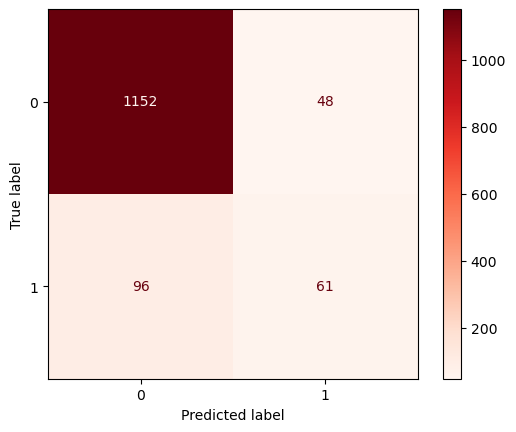

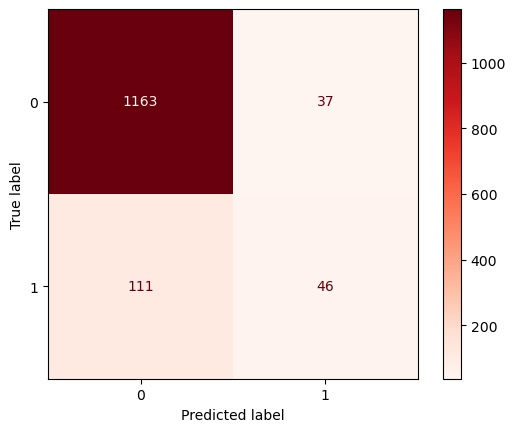

In [63]:
ypred_test_xgb=xgb_best.predict(X_test)
target = ['no', 'yes']
print('XGBoost Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_pipeline, X_test, y_test1, cmap='Reds'))
print('F1 Score - Test Set   : ', f1_score(y_test1, ypred_test_xgb), '\n')
print(classification_report(y_test1, ypred_test_xgb, target_names = target))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test1, cmap='Reds'))

Hasil dari hyperparameter tuning XGboost adalah TP nya meningkat menjadi 1163 lalu FP nya juga meningkat menjadi 111. Dan juga model ini telah dituning malah makin tidak benar dalam memprediksi variabel dependen yang bernilai yes. Hal ini dapat dilihat dari true negatif yang berkurang dari 61 hingga 46 Dan makin banyak nilai no yang diprediksi sebagai yes daripada saat sebelum dituning. Sehingga model ini tidak juga menghasilkan goodfit walaupun di tuning

### KESIMPULAN 

Sehingga kesimpulan akhir yang dapat diambil dari melakukan machine learning untuk memprediksi bagaimana performa dari beberapa model seperti KNN, SVC, Decision Tree, Random Forest dan juga XGBoost adalah :

>Pertama kita melihat bagaimana karakteristik dari pelanggan yang kita punya itu pelanggan paling banyak berada di umur 30 hingga 40 tahun dan rata-rata menolak hasil tawaran investasi kita. Lalu pelanggan juga mayoritas golongan yang sudah menikah di mana 61,9% pelanggan merupakan pelanggan yang sudah menikah dan jika kita melihat dari level edukasinya pelanggan paling banyak merupakan golongan yang menempuh hanya hingga jalur SMA lalu disusul oleh beberapa pelanggan yang tamat perguruan tinggi 

>Kedua jika melihat bagaimanakah perilaku dari pelanggan apakah akan melakukan investasi yang ditawarkan atau tidak itu terlihat dari hasil EDA berupa education level. Di mana terlihat rata-rata dari pelanggan merupakan pelanggan dengan pendidikan terakhir menempuh pendidikan tingkat sekunder atau masih SMA. Hal ini menyebabkan banyak pelanggan kita yang belum mempunyai banyak penghasilan sehingga cenderung tidak akan melakukan investasi jika ditawarkan

>Ketiga jika melihat apakah kelima model mampu memprediksi kelas no dengan baik dimana pada variabel dependen yang adalah no setelah melihat dan melakukan fit dan predict pada data uji tes dapat diprediksi dengan baik oleh kelima model. Walaupun semua model tidak baik dalam memprediksi "yes" dalam variabel dependen. Dengan model terbaik yang dapat memprediksinya adalah Random Forest dan juga XGBoost.

>Keempat dengan dilakukan Hyperparameter Tuning dari model XGBoost ini menghasilkan prediksi nilai no dari variabel dependen  lebih baik dari sebelum adanya tuning. Tetapi setelah di tuning menyebabkan model XGBoost malah tidak dapat menghasilkan performa yang lebih baik dari model XGBoost sebelum di tuning untuk memprediksi nilai Yes dalam variabel dependen kita. 

> Kurang maksimalnya hasil dari Hyperparameter tuning ini mungkin dapat disebabkan karena kurangnya kita dalam melakukan feature engineering seperti mencoba berbagai transformasi dari kolom yang sudah ada mungkin dapat meningkatkan keakuratan prediksi. Dan juga mungkin lebih baik juga jika dilakukan eksplorasi model ensemble lainnya seperti Gradient Boosting atau Stochastic Gradient Boosting juga dapat dilakukan untuk melihat apakah ada model lain yang memberikan hasil yang lebih baik.

### CONCEPTUAL PROBLEM

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

> Bagging (Bootstrap Aggregating) adalah salah satu teknik ensemble learning yang digunakan dalam machine learning untuk meningkatkan kinerja model prediksi. dimana langkah kerja bagging adalah : 
- Bagging menggunakan teknik bootstrap sampling untuk membuat beberapa dataset pelatihan baru dari dataset pelatihan asli. Bootstrap sampling mengambil sampel acak dengan penggantian dari dataset latih asli. Dengan demikian, beberapa dataset yang dihasilkan dapat memiliki beberapa contoh yang sama dan beberapa contoh yang hilang.
- Setelah dataset bootstrap dibuat, model pembelajaran yang sama diterapkan ke setiap dataset tersebut.
- Setiap model dibuat secara independen pada dataset bootstrap yang berbeda. Hal ini memungkinkan proses pelatihan dilakukan secara paralel, yang dapat menghemat waktu pelatihan secara signifikan.
- Setelah semua model dilatih, prediksi dari setiap model dihasilkan untuk setiap data uji. Prediksi ini kemudian diagregat (misalnya dengan mengambil rata-rata atau modus) untuk menghasilkan prediksi final.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

> Algoritma boosting yang saya pilih adalah XGBoost dimana Random Forest adalah kumpulan dari beberapa decision trees yang dihasilkan secara independen. Setiap decision tree dibuat dengan menggunakan teknik bagging, di mana setiap pohon dibuat dari sampel data yang diambil dengan penggantian dari dataset latih. Selain itu, untuk setiap node pemisah dalam pohon, hanya subset dari fitur yang dipertimbangkan untuk memilih pemisah terbaik. Sedangkan XGBoost adalah algoritma boosting tree yang membangun model prediksi dengan menambahkan pohon secara berurutan. Pada setiap langkah, XGBoost menyesuaikan pohon baru dengan mengurangi kesalahan residual dari model sebelumnya. XGBoost menggunakan teknik gradient boosting untuk menemukan pohon berikutnya yang akan menambahkan nilai prediksi keseluruhan. Perbedaan utama antara Random Forest dan XGBoost adalah dalam cara mereka menghasilkan ansambel model. Random Forest menghasilkan sejumlah besar pohon independen secara paralel, sementara XGBoost menghasilkan pohon secara berurutan dengan menyesuaikannya dengan kesalahan prediksi sebelumnya. Selain itu, XGBoost juga memiliki teknik regularisasi yang kuat yang membantu mengontrol kompleksitas model dan mencegah overfitting.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

> Cross-validation adalah teknik evaluasi model yang digunakan dalam machine learning untuk mengukur kinerja model secara objektif. Tujuan utama dari cross-validation adalah untuk memperkirakan seberapa baik model akan berkinerja pada data baru yang tidak terlihat. Jadi dilakukan beberapa traning set yang diuji sebagai validasi sebelum akhirnya data test kita uji. Hal ini mengakibatkan tidak adanya data leakage kepada data tes uji kita oleh model sehingga membantu memastikan bahwa model yang dihasilkan mampu mempelajari pola yang benar 

### MODEL SAVING

In [68]:
joblib.dump(xgb_best, "xgb_best.pkl")

['xgb_best.pkl']